In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
array_size = 1000
input = "input.txt"

if array_size == 10:
    input = "input_ex.txt"


In [3]:

map_hor_vert = [[0]*array_size for i in range(array_size)]
map = [[0]*array_size for i in range(array_size)]

#print(map_hor_vert)

with open(input) as f:
    lines = f.readlines()

for l in lines:
    la = l.split()
    x1 = int(la[0].split(",")[0])
    y1 = int(la[0].split(",")[1])
    x2 = int(la[2].split(",")[0])
    y2 = int(la[2].split(",")[1])

    if x1 == x2:
        for i in range(min(y1,y2),max(y1,y2)+1):
            map_hor_vert[i][x1] += 1
            map[i][x1] += 1
            #print("{0}-{1}".format(x1,i))
    elif y1 == y2:
        for i in range(min(x1,x2),max(x1,x2)+1):
            map_hor_vert[y1][i] += 1
            map[y1][i] += 1
            #print("{0}-{1}".format(i,y1))
    else:

        xdir = 1 if x2 > x1 else -1
        ydir = 1 if y2 > y1 else -1
        x = x1
        y = y1
        for i in range(min(x1,x2),max(x1,x2)+1):
            map[y][x] += 1

            x += xdir
            y += ydir

#print(map_hor_vert)


In [4]:
tmp_array = []
full_tmp_array = []
cnt_greater_than_2 = 0
full_cnt_greater_than_2 = 0
for y in range(0,array_size):
    for x in range(0,array_size):
        tmp_array.append([x,y,map_hor_vert[y][x]])
        full_tmp_array.append([x,y,map[y][x]])
        if map_hor_vert[y][x] >= 2:
            cnt_greater_than_2 += 1
        if map[y][x] >= 2:
            full_cnt_greater_than_2 += 1

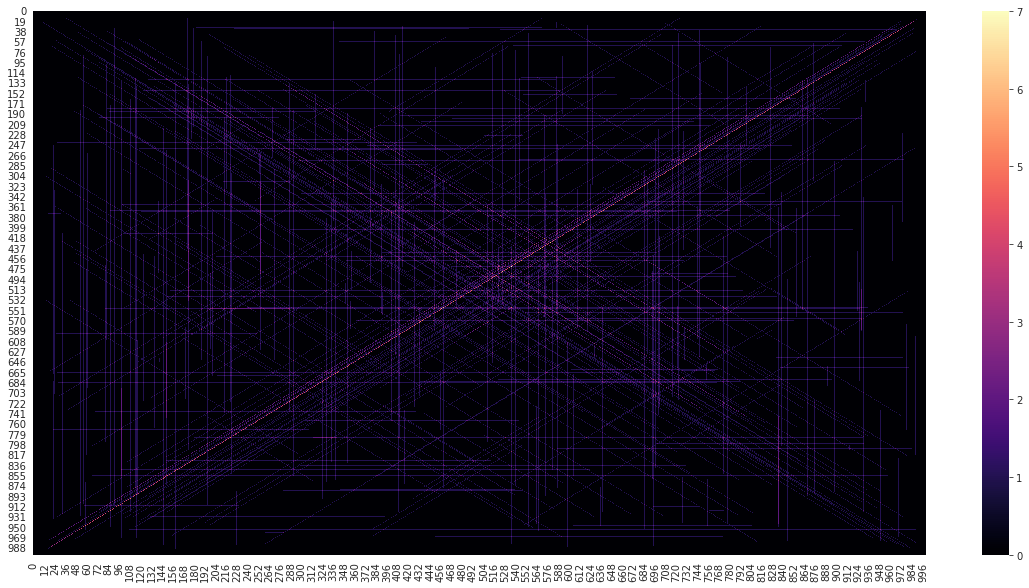

In [15]:

#df_hor_vert = pd.DataFrame( tmp_array, columns=["x","y","cnt"]  )
#alt.data_transformers.disable_max_rows()
#alt.Chart(df_hor_vert).mark_rect().encode(
#    x='x:O',
#    y='y:O',
#    color='cnt:Q'
#)

#df = pd.DataFrame( full_tmp_array, columns=["x","y","cnt"]  )
#alt.data_transformers.disable_max_rows()
#alt.Chart(df).mark_rect().encode(
#    x='x:O',
#    y='y:O',
#    color='cnt:Q'
#)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(map, cmap="magma")

In [6]:
print("pb1 {0}".format(cnt_greater_than_2))
print("pb2 {0}".format(full_cnt_greater_than_2))

pb1 4421
pb2 18674
